<a href="https://colab.research.google.com/github/mitrasubham/OpenCVLLM/blob/main/Comparing%20tesserect%20with%20CRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Comparing tesserect with CRNN

In [1]:
!pip install tensorflow==2.15

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installation

In [4]:
!pip install keras_ocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.0 MB/s eta 0:00:00


In [2]:
!apt install libtesseract-dev tesseract-ocr > /dev/null

In [6]:
!pip install pytesseract > /dev/null

In [ ]:
!apt install libtesseract-dev tesseract-ocr > /dev/null
!pip install pytesseract > /dev/null
!pip install keras-ocr > /dev/null

In [7]:
import keras_ocr
import pytesseract
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
detector = keras_ocr.detection.Detector()

Looking for /root/.keras-ocr/craft_mlt_25k.h5


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


In [9]:
def tess_recognize_from_boxes(image, detections, config):
  predictions = []
  # for each box
  for i, box in enumerate(detections):
    # get the cropped and algned image
    cropped_warped = keras_ocr.tools.warpBox(image, box)

    # Perform tesseract OCR on the cropped Text
    text = pytesseract.image_to_string(cropped_warped, config=config)

    # Store the text and the corresponding box
    if text:
      predictions.append((text, box))
  return predictions

In [10]:
def modified_tesseract(image, config=('--psm 6')):
  # Detect the Text boxes from the image using Keras-ocr
  detections = detector.detect([image])[0]

  # Run tesseract on boxes defined above
  predictions = tess_recognize_from_boxes(image, detections, config)

  return predictions

In [11]:
pipeline = keras_ocr.pipeline.Pipeline(scale=1)

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [12]:
def compare_ocr(filename,figsize=(20,8)):
    # Load Image
    image = keras_ocr.tools.read(filename)
    image_tess = image.copy()
    image_kerasocr = image.copy()

    # Perform OCR
    tesseract_predictions = modified_tesseract(image_tess)
    kerasocr_predictions = pipeline.recognize([image_kerasocr])

    # Create a figure with a set of subplots
    fig,axs = plt.subplots(ncols=3,nrows=1, figsize = figsize)
    axs[0].set_title("Tesseract OCR")
    axs[2].set_title("Keras OCR");

    # Display Tesseract Output
    keras_ocr.tools.drawAnnotations(image_tess, tesseract_predictions,ax=axs[0])

    # Add a divider
    axs[1].imshow(np.zeros((image.shape[0],2)))
    axs[1].set_yticks([])
    axs[1].set_xticks([])

    # Display keras ocr output
    keras_ocr.tools.drawAnnotations(image_kerasocr, kerasocr_predictions[0],ax=axs[2])

In [ ]:
!wget https://www.dropbox.com/s/uwrdek4jjac4ysz/book2.jpg?dl=1 -O book2.jpg --quiet

9/9 [==============================] - 72s 8s/step


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12 () missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


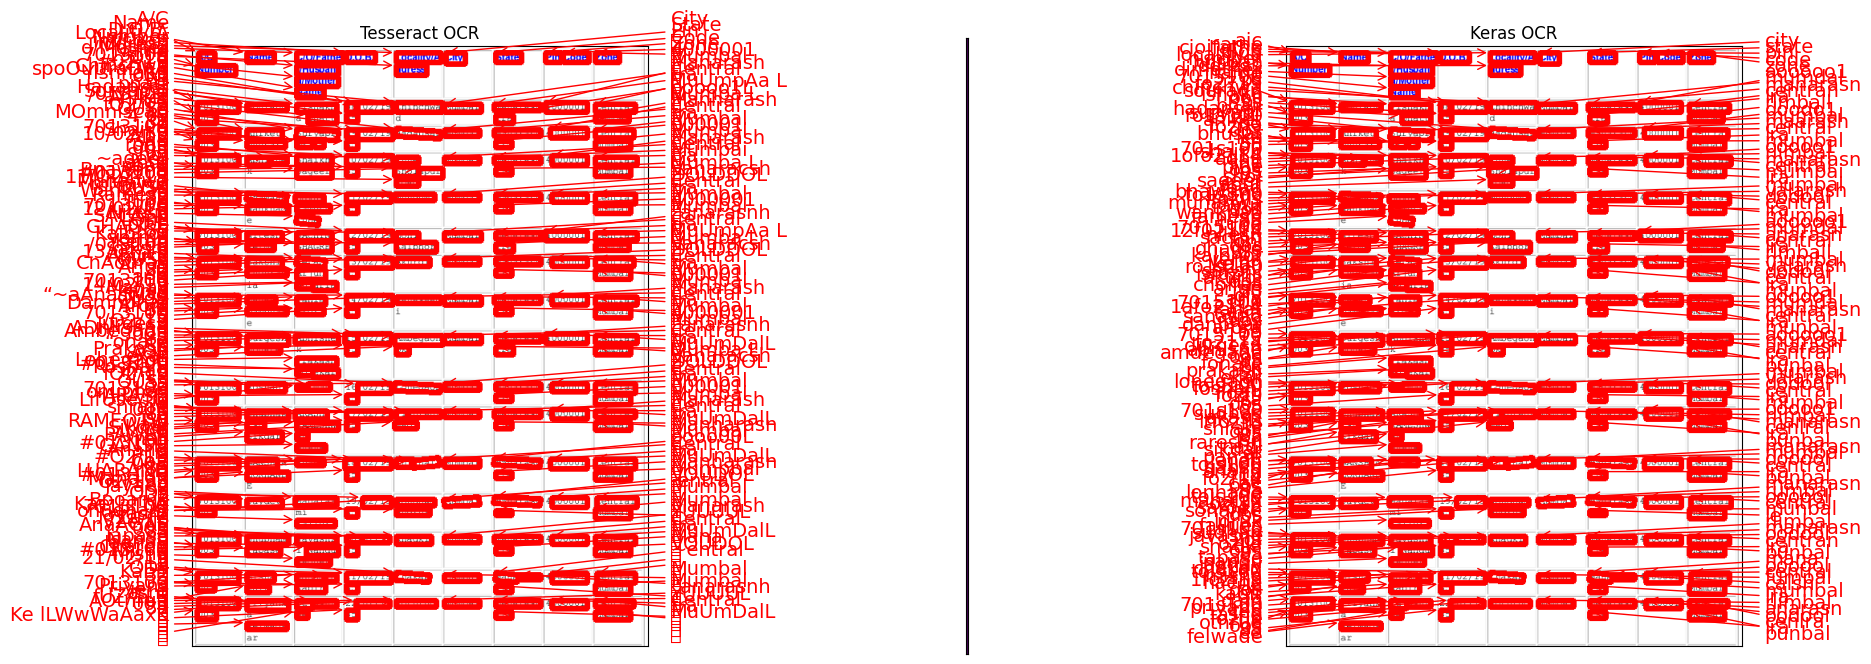

In [13]:
compare_ocr("page1.png")